In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv(r"C:\Users\UMAIMASADAF\Desktop\cleaned_df.csv")

In [10]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    float64
 13  thal        303 non-null    float64
 14  target      303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


In [12]:
df.isna().any().any()

False

In [14]:
df.shape

(303, 15)

In [15]:
df.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.623762,245.194719,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,48.488324,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


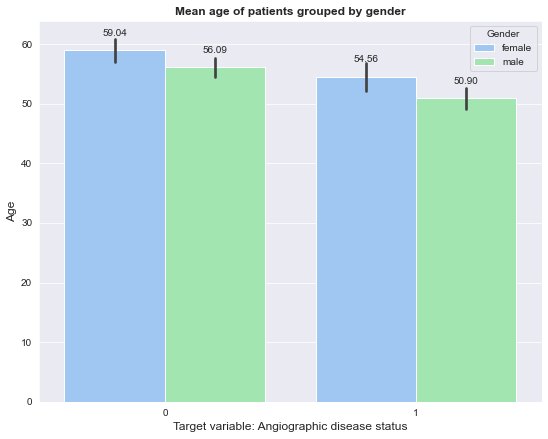

In [17]:

plt.figure(figsize=(9,7))
plt.style.use('seaborn-pastel')
labels=['female','male']
sns.set_style("darkgrid")
ax=sns.barplot(x='target',y='age',data=df,hue='sex')
h, l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Gender",loc='upper right')
ax.set_ylabel("Age",fontdict={'fontsize' : 12})
ax.set_xlabel("Target variable: Angiographic disease status",fontdict={'fontsize' : 12})
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x+ 0.15, y + height + 2.4))
plt.title('Mean age of patients grouped by gender',fontweight="bold")
plt.show()

In [19]:
x= df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,[0,3,4,7,9,11]] = sc.fit_transform(x_train[:,[0,3,4,7,9,11]])
x_test[:,[0,3,4,7,9,11]] = sc.transform(x_test[:,[0,3,4,7,9,11]])

In [22]:
print(x_train[0])

[-8.77553531e-01  4.30000000e+01  0.00000000e+00  9.85842433e-01
 -5.74125126e-01  2.13000000e+02  0.00000000e+00  9.01639128e-01
  1.65000000e+02 -7.09299366e-01  2.00000000e-01 -6.61693160e-01
  0.00000000e+00  2.00000000e+00]


In [23]:
print(x_test[0])

[  0.8237336   70.           1.          -0.92274852   0.77251645
 174.           0.           0.90163913 125.           1.40984195
   2.6         -2.27916533   0.           3.        ]


In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)


KNeighborsClassifier()

In [25]:
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]]


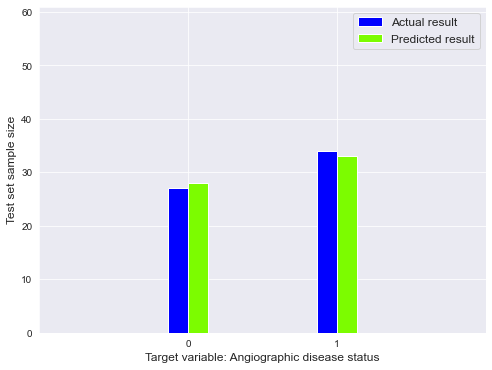

In [26]:

bins = np.linspace(-1,2,10)
plt.figure(figsize=(8,6))
ax =plt.hist([y_test,y_pred],bins=bins,color=['blue','lawngreen'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Target variable: Angiographic disease status',fontdict={'fontsize' : 12})
plt.ylabel('Test set sample size',fontdict={'fontsize' : 12})
plt.xlim(-1,2)
plt.xticks([0,1])
plt.ylim(0,len(y_test))
plt.legend(prop={'size': 12})
plt.show()

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac_KNN = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [28]:
# Printing accuarcy score
print(ac_KNN)

0.6885245901639344


In [30]:
print(ac_KNN)


0.6885245901639344
